In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
#Read data from csv
data = pd.read_csv("testdata.csv")

In [4]:
X = data.drop(["class"], axis = 1)

y = data["class"]

In [5]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.head()

,sentence_per_paragraph,words_per_paragraph,)present,-present,;or:present,?present,standard_dev_in_sentence_len,length_diff_in_consective_sentence,sentence<11,sentence>34,contains_although,contains_However,contains_but,contains_because,contains_this,contains_others_or_researchers,contains_num,contains_more_capitals,contains_et
44233,14,360,False,True,False,False,13.703120,12.928571,2,4,False,False,False,False,False,True,True,True,True
58749,11,295,True,True,False,False,10.443077,9.272727,1,4,False,False,False,False,False,False,False,True,True
56296,13,212,False,False,True,False,9.840142,8.000000,5,1,False,False,True,False,True,False,True,True,True
23444,19,667,False,True,False,False,16.195824,17.684211,0,9,False,False,True,True,True,False,True,True,True
48936,8,174,False,True,True,False,8.407586,11.250000,1,0,False,False,False,False,False,True,False,True,True


In [6]:
import category_encoders as ce

# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(list(X_train))


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

X_train.head()

,sentence_per_paragraph,words_per_paragraph,)present,-present,;or:present,?present,standard_dev_in_sentence_len,length_diff_in_consective_sentence,sentence<11,sentence>34,contains_although,contains_However,contains_but,contains_because,contains_this,contains_others_or_researchers,contains_num,contains_more_capitals,contains_et
44233,14,360,False,True,False,False,13.703120,12.928571,2,4,False,False,False,False,False,True,True,True,True
58749,11,295,True,True,False,False,10.443077,9.272727,1,4,False,False,False,False,False,False,False,True,True
56296,13,212,False,False,True,False,9.840142,8.000000,5,1,False,False,True,False,True,False,True,True,True
23444,19,667,False,True,False,False,16.195824,17.684211,0,9,False,False,True,True,True,False,True,True,True
48936,8,174,False,True,True,False,8.407586,11.250000,1,0,False,False,False,False,False,True,False,True,True


In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [9]:
#Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(X_test)

In [10]:
#Check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.6551


In [11]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.6758
Test set score: 0.6551


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.63      0.77      0.69     10553
           1       0.70      0.54      0.61     10567

    accuracy                           0.66     21120
   macro avg       0.66      0.66      0.65     21120
weighted avg       0.66      0.66      0.65     21120



[Text(0.6712189226519337, 0.9545454545454546, 'x[1] <= 915.5\nentropy = 1.0\nsamples = 42880\nvalue = [21447, 21433]'),
 Text(0.3579074585635359, 0.8636363636363636, 'x[1] <= 192.5\nentropy = 0.995\nsamples = 39693\nvalue = [21423, 18270]'),
 Text(0.10352209944751381, 0.7727272727272727, 'x[1] <= 166.5\nentropy = 0.628\nsamples = 3197\nvalue = [503.0, 2694.0]'),
 Text(0.030662983425414365, 0.6818181818181818, 'x[1] <= 147.5\nentropy = 0.244\nsamples = 1458\nvalue = [59, 1399]'),
 Text(0.009944751381215469, 0.5909090909090909, 'x[1] <= 4.0\nentropy = 0.141\nsamples = 800\nvalue = [16, 784]'),
 Text(0.0077348066298342545, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.012154696132596685, 0.5, 'x[6] <= 5.511\nentropy = 0.134\nsamples = 799\nvalue = [15.0, 784.0]'),
 Text(0.009944751381215469, 0.4090909090909091, 'entropy = 0.0\nsamples = 144\nvalue = [0, 144]'),
 Text(0.014364640883977901, 0.4090909090909091, 'x[1] <= 105.5\nentropy = 0.157\nsamples = 655\nvalue = [15, 640]')

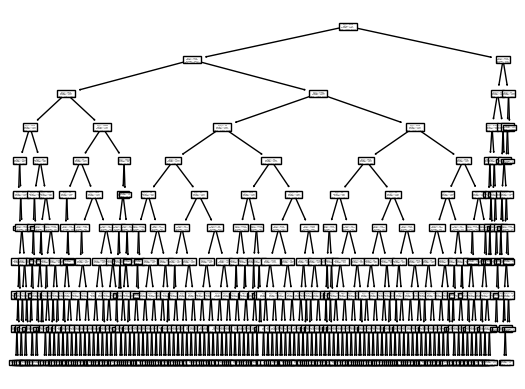

In [12]:
from sklearn import tree
tree.plot_tree(clf_en)